# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [24]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style= 'whitegrid', context='notebook')



Aqui una descripcion de los datos:
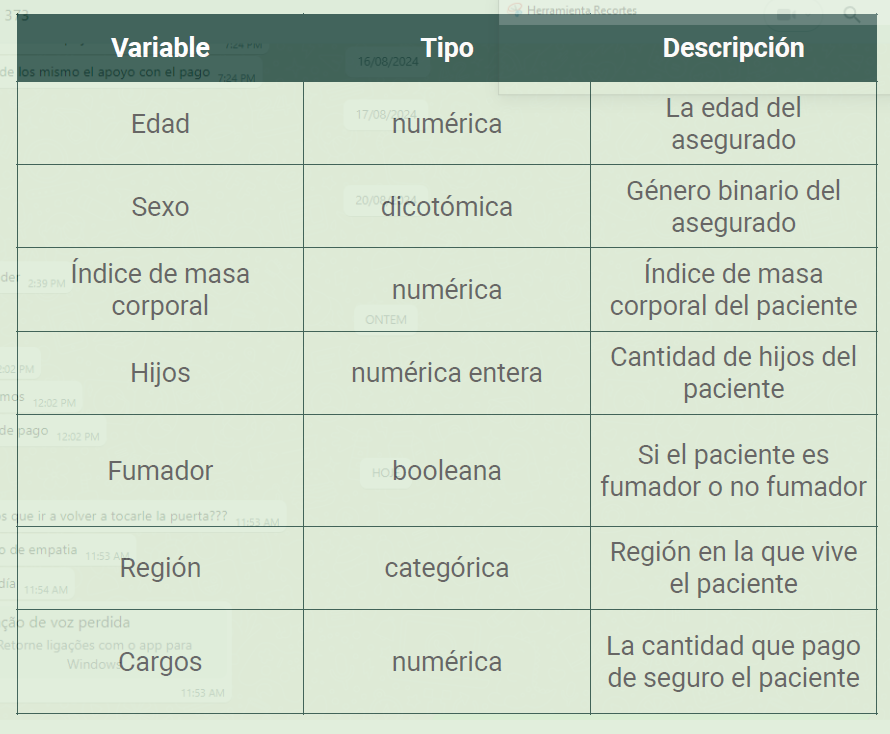

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [25]:
df = pd.read_csv('insurance.csv')

df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

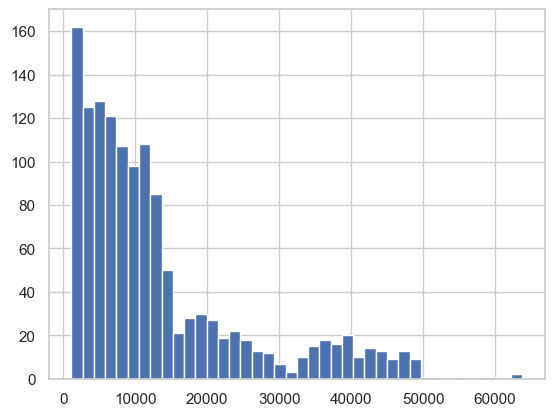

In [26]:
df.charges.hist(bins = 40)
plt.show()

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [27]:
df = df[df.charges < 50000]

En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

In [28]:
# Valores estadisticos de las variables numericas
df_numerics = df[['age','bmi','charges']]
df[['age','bmi','charges']].describe()

,age,bmi,charges
count,1331.000000,1331.000000,1331.000000
mean,39.185575,30.633017,13036.775677
std,14.058021,6.088782,11699.360324
min,18.000000,15.960000,1121.873900
25%,26.000000,26.220000,4719.630300
50%,39.000000,30.305000,9301.893550
75%,51.000000,34.600000,16359.170275
max,64.000000,53.130000,49577.662400


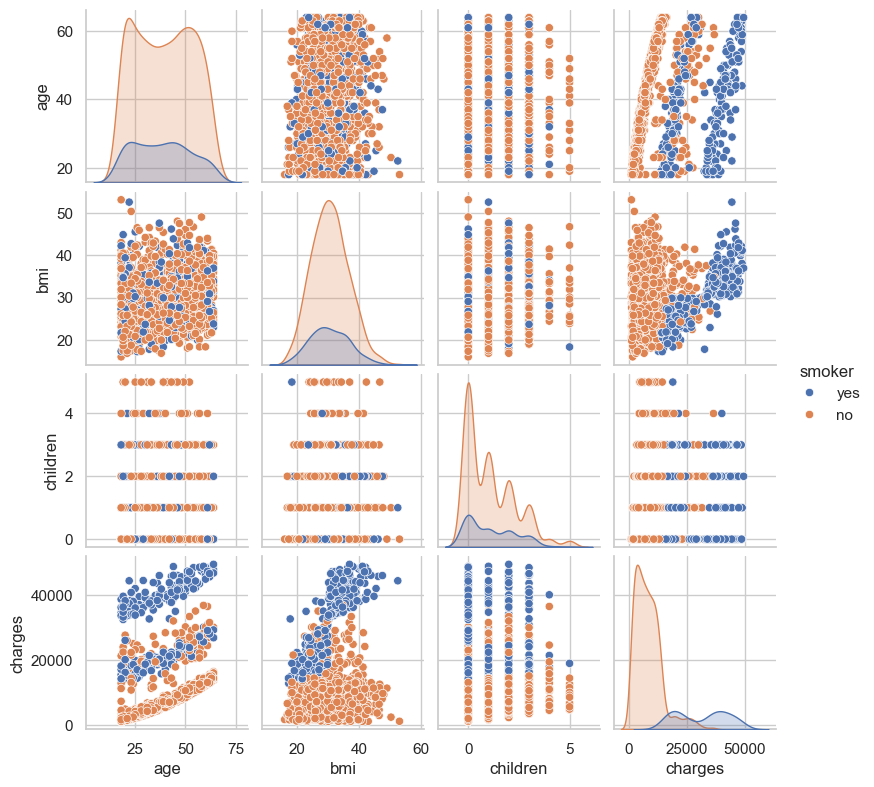

In [29]:
sns.pairplot(df[['age','bmi','children','charges','smoker']],hue=  "smoker", height=2)
plt.show()

### Conclusiones rapidas(propias): 
- Las personas con habitos de fumador podrian representar al grupo que mas gasto genera. Esto se puede visualizar de forma directa en el grafico de distribucion de charges. 
- Ademas de que un bmi mayor al 24 que es el normal, osea personas que presentan sobrepeso y ademas son fumadores, presentan al grupo con mayor generacion de gastos
- La edad es un factor no tan determinante, pero teniendo en cuenta los habitos (fuma o no) tambien se muestra una relacion con los gastos.
- La columna de children desde mi punto de vista presenta poca relevancia, ya que no lo veo como un factor determinante para el cargo de gastos, ni directa ni indirectamente

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

- En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

###  Matriz de Correlacion

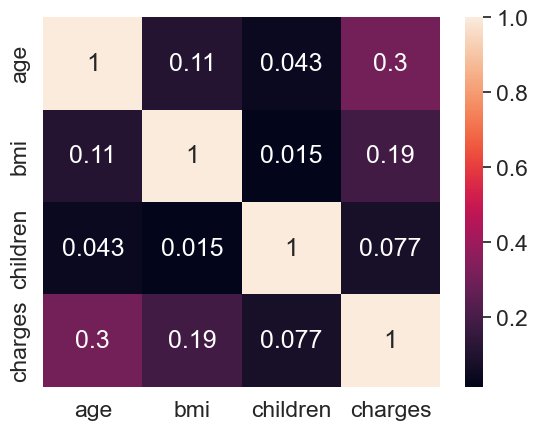

In [30]:
import numpy as np 
numerics_cols = ['age','bmi','children','charges']
corr = np.corrcoef(df[numerics_cols].values.T)

sns.set(font_scale= 1.5)
sns.heatmap(corr, annot=True, yticklabels= numerics_cols, xticklabels= numerics_cols)
plt.show()


## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Haremos un one-hot encoder a las variables categoricas para poder analizar su correlacion con la variable target

In [31]:
df_copi = pd.get_dummies(df, columns=['sex','smoker','region'], 
                        drop_first= True,   # Borra las primeras columas ya que se correlacionan mucho con las otras
                        dtype= 'int')       # Convertimos los resultados a 1's y 0's
df_copi

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


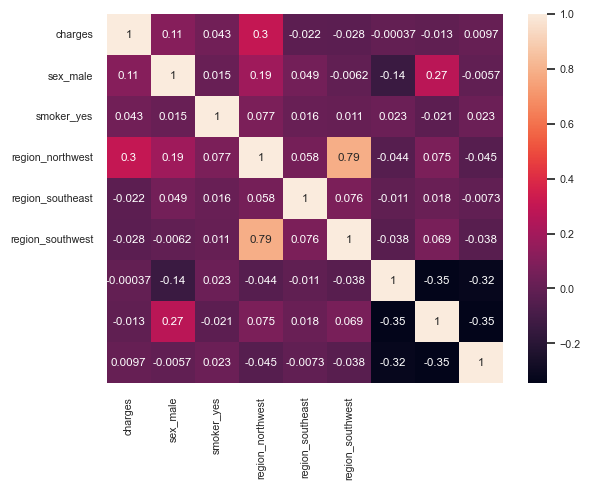

In [32]:
import numpy as np 
cat_cols = ['charges',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']
corr = np.corrcoef(df_copi.values.T)

sns.set(font_scale= 0.7)
sns.heatmap(corr, annot=True, yticklabels= cat_cols, xticklabels= cat_cols)
plt.show()


Pesima forma de analizar variables categoricas, no lo usaria a menos que vea que estan directamente relacionadas al problema base.

In [33]:
import recursos as rq

rq.box_and_whisker(df,label_x='smoker',label_y='charges', label_x2='sex')

En esta grafica separamos a los grupos de fumadores y no fumadores, añadiendo la dimension de tipo de sexo, podemos notar que el sexo no es tan distintivo al momento de analizar los cargos, a diferencia de si es fumador o no, como se habia concluido antiormente

In [34]:
rq.box_and_whisker(df,label_x='sex', label_y='charges',label_x2='smoker')

Aqui corroboramos la conclusion anterior desde otro punto de vista, separamos los grupos de hombres y mujeres, ademas de que añadimos la dimension de fumadores, y podemos notar que no hay mucha diferencia entre si es mujer o no, ya que incluso los valores de media son algo cercanos

In [35]:
rq.box_and_whisker(df,label_x='sex', label_y='charges')

Indistintamente si se trata de un hombre o una mujer, no se puede visualizar una relacion con los cargos. Asi que podria optar por no tener en cuenta esta variable

In [36]:
rq.box_and_whisker(df, label_x='children',label_y='charges',label_x2='sex')

Aqui añadimos la dimension de numero de hijos y podemos visualizar de forma directa que no es una variable relevante.

In [37]:
rq.box_and_whisker(df, label_x='children',label_y='charges',label_x2='smoker')

### Conclusion Final
Nos quedamos con las siguientes variables

In [38]:
data = pd.get_dummies(df, columns=['smoker'], drop_first=True, dtype='int')
data = data[['age','bmi','smoker_yes','charges']]
data

,age,bmi,smoker_yes,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## Creando modelos 
Primero se usará un modelo con todas las variables.

In [39]:
# 
df = pd.get_dummies(df, columns=['sex','smoker','region'],
                    drop_first= True, 
                    dtype='int')
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# X = data[['age','bmi','smoker_yes']].values 
# Y = data['charges'].values.reshape(-1,1)

X_cols = list(set(df.columns)-set(['charges'])) # seleccionamos los nombres de las columnas que vamos a usar 
Y_cols =['charges']

X = df[X_cols].values
Y = df[Y_cols].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# Entrenamos los escaladores ya que los aplicaremos a los datos de train y test
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)


In [41]:
# Modelo de regresion lineal

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [42]:
# Realizar predicciones usando el modelo entrenado
y_pred_std = model.predict(X_test)

# Transformar las predicciones de vuelta a la escala original
y_pred = sc_y.inverse_transform(y_pred_std)
y_original = sc_y.inverse_transform(Y_test)


from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, max_error, r2_score

# Calcular R^2
r2 = r2_score(y_original, y_pred)

# Calcular R^2 ajustado
n = len(y_original)  # número de muestras
k = X.shape[1]       # número de predictores
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Calcular otras métricas
mape = mean_absolute_percentage_error(y_original, y_pred)
mse = mean_squared_error(y_original, y_pred)
var_residual = mse  # En este contexto, MSE puede interpretarse como varianza residual
max_err = max_error(y_original, y_pred)

# Mostrar los resultados
print(f"Error Absoluto Medio Porcentual (MAPE): {mape * 100:.5f}%")
print(f"Coeficiente de Determinación Ajustado (R^2 ajustado): {r2_adjusted:.5f}")
print(f"Varianza Residual (MSE): {var_residual:.5f}")
print(f"Error Máximo: {max_err:.5f}")
print(f"R-cuadrado: {r2:.5f}")

Error Absoluto Medio Porcentual (MAPE): 39.13882%
Coeficiente de Determinación Ajustado (R^2 ajustado): 0.73846
Varianza Residual (MSE): 34053811.78427
Error Máximo: 24403.32888
R-cuadrado: 0.74476


In [43]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes los datos en un DataFrame 'df' con tus variables independientes y dependientes
X = df[['region_southwest', 'region_northwest', 'children', 'smoker_yes', 'region_southeast', 'age', 'bmi', 'sex_male']]
y = df['charges']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos los escaladores ya que los aplicaremos a los datos de train y test
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)


# Crear el modelo de regresión
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Agregar una constante a X para el intercepto
X_train_sm = sm.add_constant(X_train)

# Usar statsmodels para generar el resumen
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()

# Mostrar el resumen
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     383.9
Date:                Tue, 10 Sep 2024   Prob (F-statistic):          3.92e-306
Time:                        11:55:50   Log-Likelihood:                -10727.
No. Observations:                1064   AIC:                         2.147e+04
Df Residuals:                    1055   BIC:                         2.152e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.301e+04    178.286     72.976      0.0

In [47]:
from scipy import stats
# Extraer los valores deseados y redondear a 3 decimales
r_squared = round(results.rsquared, 3)
adj_r_squared = round(results.rsquared_adj, 3)
f_statistic = round(results.fvalue, 3)
prob_f_statistic = round(results.f_pvalue, 3)
coefficients = results.params.round(3)
p_values = results.pvalues.round(3)

# Calcular el test de Omnibus, skew y kurtosis y redondear a 3 decimales
omnibus_test = stats.normaltest(results.resid)
omnibus = round(omnibus_test.statistic, 3)
prob_omnibus = round(omnibus_test.pvalue, 3)
skew = round(stats.skew(results.resid), 3)
kurtosis = round(stats.kurtosis(results.resid), 3)

# Calcular Durbin-Watson y redondear a 3 decimales
durbin_watson = round(sm.stats.durbin_watson(results.resid), 3)

# Crear la lista o diccionario con los datos solicitados
resultados = {
    'R-squared': r_squared,
    'Adj. R-squared': adj_r_squared,
    'F-statistic': f_statistic,
    'Prob (F-statistic)': prob_f_statistic,
    'Coefficients and P-values': dict(zip(range(len(coefficients)), zip(coefficients, p_values))),
    'Omnibus': omnibus,
    'Prob(Omnibus)': prob_omnibus,
    'Skew': skew,
    'Kurtosis': kurtosis,
    'Durbin-Watson': durbin_watson
}

# Imprimir resultados
for key, value in resultados.items():
    print(f'{key}: {value}')


R-squared: 0.744
Adj. R-squared: 0.742
F-statistic: 383.854
Prob (F-statistic): 0.0
Coefficients and P-values: {0: (13010.683, 0.0), 1: (-456.96, 0.039), 2: (-163.979, 0.46), 3: (765.644, 0.0), 4: (9194.866, 0.0), 5: (-522.531, 0.022), 6: (3583.323, 0.0), 7: (1689.306, 0.0), 8: (-29.16, 0.87)}
Omnibus: 233.259
Prob(Omnibus): 0.0
Skew: 1.236
Kurtosis: 2.213
Durbin-Watson: 1.978


## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

El siguiente código muestra un resumen general de los resultados.

Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

Analizando el segundo modelo